<a href="https://colab.research.google.com/github/DenisPikhenko/Fintech/blob/main/Fintech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt
plt.style.use('dark_background')
pd.options.plotting.backend = "matplotlib"

Как финансовое учреждение, регулируемое FCA, компании обязаны проверять личность всех клиентов, которые хотят открыть счет компании (Know Your Customer - KYC). Каждый потенциальный клиент должен пройти процедуру KYC, предоставив удостоверение личности с фотографией государственного образца и фотографию своего лица. Затем происходит 2 проверки:

• Проверка документов: чтобы убедиться, что удостоверение личности с фотографией является действительным и подлинным;

• Проверка сходства лиц: чтобы убедиться, что лицо на снимке совпадает с лицом на предоставленном удостоверении личности.

Клиент проходит процедуру KYC, если результаты проверки как документов, так и сходства лиц будут пройдены. Если какая-либо проверка будет не пройдена, то клиент должен отправить все фотографии повторно.

Коэффициент прохождения (pass rate) определяется как количество клиентов, прошедших оба процесса KYC, деленное на количество клиентов, которые попытались пройти этот процесс. У каждого клиента есть до 2 попыток.
За последнее время проходной балл существенно снизился.

Найдите причину и предложите решение.

Соответствующие файлы:

• Отчеты обо всех проверках сходства лиц

• Отчеты обо всех проверках документов

• veritas.html - Документация, объясняющая некоторые термины, используемые в отчетах.

Docs: https://drive.google.com/file/d/1DNfcATahmuzfDS03aLcA9IzZmVObCK9U/view?usp=sharing

Faces: https://drive.google.com/file/d/1QUdX-d2nx_8vX6Els3Re6E-qr6BOPCvI/view?usp=sharing

In [135]:
!gdown --id 1DNfcATahmuzfDS03aLcA9IzZmVObCK9U
!gdown --id 1QUdX-d2nx_8vX6Els3Re6E-qr6BOPCvI

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1DNfcATahmuzfDS03aLcA9IzZmVObCK9U
To: /content/doc_reports_sample.csv
100% 1.60M/1.60M [00:00<00:00, 147MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1QUdX-d2nx_8vX6Els3Re6E-qr6BOPCvI
To: /content/face_reports_sample.csv
100% 706k/706k [00:00<00:00, 125MB/s]


In [197]:
doc = pd.read_csv('doc_reports_sample.csv')
face = pd.read_csv('face_reports_sample.csv')

## Просмотр DataFrame doc.

In [198]:
doc.sample(10)

,Unnamed: 0,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result
4646,75295,a78c72b2d08b40b284e561bedd199814,clear,clear,clear,clear,clear,2017-10-06 10:30:10,clear,clear,clear,clear,clear,NaN,2c1c8282cf7c49bc8a44a53ae31ff8cc,clear,clear,"{'gender': 'Female', 'nationality': 'THA', 'do...",clear
3142,115597,e66b6025d50348d38999dd483eaece40,clear,clear,clear,clear,clear,2017-09-11 13:20:04,clear,clear,clear,clear,NaN,NaN,cc2326f4b0514115822d67750d3e8949,clear,NaN,"{'gender': 'Female', 'issuing_date': '2016-11-...",clear
626,54194,a92426ecc967499fbf44b327261b680e,clear,clear,clear,clear,clear,2017-07-25 09:48:42,clear,NaN,NaN,clear,NaN,NaN,52eef799e3474abfa2294bea5b710d1b,clear,NaN,"{'issuing_date': '2014-01-27', 'document_type'...",clear
4983,18021,1ef36d29573f4906821b562939b292c1,clear,clear,clear,clear,clear,2017-10-11 09:01:27,clear,clear,clear,clear,clear,NaN,8d1990b3e95c4ec180d9de990ec0b049,clear,clear,"{'gender': 'Male', 'issuing_date': '2008-05', ...",clear
3521,116523,e874ccc6d2bb456b97b76a997efc4692,consider,NaN,consider,NaN,unidentified,2017-09-10 15:57:25,clear,NaN,NaN,NaN,NaN,NaN,0170eaeff4e24c35b6a6106dcd1b9c48,NaN,NaN,{},rejected
4990,22750,0f668c42b593483f866769382807517a,clear,clear,clear,clear,clear,2017-10-09 11:12:01,clear,clear,clear,clear,NaN,NaN,7e8c44d8d4b34179b47bdd7d8b8abac7,clear,NaN,"{'issuing_date': '2013-10-23', 'document_type'...",clear
4249,63106,7cefa82b24854ff9ae2a23be7f7d81ac,clear,clear,clear,clear,clear,2017-10-14 00:03:35,clear,clear,clear,clear,clear,NaN,f2f537ed357d4bb6a4c98f23b591f151,clear,clear,"{'gender': 'Female', 'nationality': 'ITA', 'do...",clear
1312,168981,c29dc6eca7ba4c4e86d7b19a405ea460,consider,consider,clear,clear,clear,2017-07-17 13:07:18,clear,NaN,NaN,NaN,NaN,NaN,61e2a0f7461741568ed21f53e7389575,clear,NaN,"{'issuing_date': '2011-07-21', 'document_type'...",caution
5064,41305,0742106f96734aa0bcbd4f6539286f13,consider,clear,consider,clear,clear,2017-10-18 19:43:16,clear,consider,clear,clear,clear,NaN,d97fb09ebc674c18a0c500fe652e2b19,clear,clear,"{'gender': 'Male', 'nationality': 'FRA', 'docu...",caution
1329,51056,bb5cb7323840406e9e1e6ea23f16d037,clear,clear,clear,clear,clear,2017-07-18 11:04:32,clear,NaN,NaN,clear,NaN,NaN,fcf117c1843a49e6a90609672e2fd9e4,clear,NaN,"{'issuing_date': '2015-11-17', 'document_type'...",clear


Размер DataFrame doc.

In [199]:
doc.shape

(5880, 19)

In [200]:
doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Unnamed: 0                          5880 non-null   int64 
 1   user_id                             5880 non-null   object
 2   result                              5880 non-null   object
 3   visual_authenticity_result          4991 non-null   object
 4   image_integrity_result              5880 non-null   object
 5   face_detection_result               4990 non-null   object
 6   image_quality_result                5880 non-null   object
 7   created_at                          5880 non-null   object
 8   supported_document_result           5869 non-null   object
 9   conclusive_document_quality_result  3140 non-null   object
 10  colour_picture_result               3140 non-null   object
 11  data_validation_result              4739 non-null   obje

Пропуски в doc.

In [201]:
doc.isna().mean().sort_values(ascending=False)

data_comparison_result                0.985544
compromised_document_result           0.740816
data_consistency_result               0.485544
conclusive_document_quality_result    0.465986
colour_picture_result                 0.465986
data_validation_result                0.194048
police_record_result                  0.185204
face_detection_result                 0.151361
visual_authenticity_result            0.151190
supported_document_result             0.001871
properties                            0.000000
attempt_id                            0.000000
Unnamed: 0                            0.000000
user_id                               0.000000
created_at                            0.000000
image_quality_result                  0.000000
image_integrity_result                0.000000
result                                0.000000
sub_result                            0.000000
dtype: float64

In [202]:
def df_value_counts(df: pd.DataFrame):
    df_col = df.columns.values
    for col in df_col:
        if col != 'properties':
            display(df[col].value_counts(dropna=False,
                                         normalize=True))
            print('\n')

Посмотрим все уникальные значения, которые есть в doc.

In [203]:
df_value_counts(doc)

27241     0.00017
98124     0.00017
116325    0.00017
124629    0.00017
89007     0.00017
           ...   
145278    0.00017
146875    0.00017
138771    0.00017
153739    0.00017
19417     0.00017
Name: Unnamed: 0, Length: 5880, dtype: float64

12028371d6c943babadf18224ebe96cb    0.00034
67a943369bbc48e187c3a07b35302f65    0.00034
b6f9bdc46bb543bab45e6c34e850adf7    0.00034
2e98fa65f2fe4d76a1ff0f30bd4048a9    0.00034
0b3fe48a14554fa687e5152a1c20d768    0.00034
                                     ...   
61ebe1797db7451ca218573ed2da41a1    0.00017
2e3b8deec6914a81be669462dc2bc82c    0.00017
a3c7ba928024419dbece61de8824c66e    0.00017
ded4e9772ac94f48b2c93c93b04ea8ae    0.00017
be89b841eda0429999a6fa4cee5c29a9    0.00017
Name: user_id, Length: 5848, dtype: float64

clear       0.74932
consider    0.25068
Name: result, dtype: float64

clear       0.832313
NaN         0.151190
consider    0.016497
Name: visual_authenticity_result, dtype: float64

clear       0.772619
consider    0.227381
Name: image_integrity_result, dtype: float64

clear       0.844728
NaN         0.151361
consider    0.003912
Name: face_detection_result, dtype: float64

clear           0.858163
unidentified    0.141837
Name: image_quality_result, dtype: float64

2017-07-17 14:51:10    0.00034
2017-06-22 11:07:52    0.00034
2017-07-19 09:27:27    0.00034
2017-07-19 11:37:20    0.00034
2017-09-30 09:55:07    0.00034
                        ...   
2017-08-13 19:50:39    0.00017
2017-08-09 08:29:11    0.00017
2017-08-21 14:03:32    0.00017
2017-08-22 07:10:51    0.00017
2017-10-10 15:55:21    0.00017
Name: created_at, Length: 5874, dtype: float64

clear           0.988776
unidentified    0.009354
NaN             0.001871
Name: supported_document_result, dtype: float64

NaN         0.465986
clear       0.458163
consider    0.075850
Name: conclusive_document_quality_result, dtype: float64

clear       0.533673
NaN         0.465986
consider    0.000340
Name: colour_picture_result, dtype: float64

clear       0.796429
NaN         0.194048
consider    0.009524
Name: data_validation_result, dtype: float64

clear       0.513605
NaN         0.485544
consider    0.000850
Name: data_consistency_result, dtype: float64

NaN         0.985544
clear       0.013605
consider    0.000850
Name: data_comparison_result, dtype: float64

30e11e95e30748f485a2271ca5e6abb8    0.00017
36cdad584d484c509bb679ba5ed9dc93    0.00017
451242f997554ed9bfc4e4f502c31d30    0.00017
e4d3c053b8914fdcbdb81f3611f0f4ad    0.00017
9b84a8d7a85c44bb9f92810f49ed4275    0.00017
                                     ...   
291c869496334107865f221a254e9201    0.00017
dc7f23a61a6949118ba0452cc5c12465    0.00017
d51915db9f3e49c082e138731ad046cc    0.00017
574541d76a01442ca16a0a7e42c0b710    0.00017
4cd0099087114252887d57a3ab254c88    0.00017
Name: attempt_id, Length: 5880, dtype: float64

clear    0.814796
NaN      0.185204
Name: police_record_result, dtype: float64

NaN      0.740816
clear    0.259184
Name: compromised_document_result, dtype: float64

clear        0.749320
rejected     0.151190
caution      0.089286
suspected    0.010204
Name: sub_result, dtype: float64

## Просмотр DataFrame face.

In [204]:
face.sample(10)

,Unnamed: 0,user_id,result,face_comparison_result,created_at,facial_image_integrity_result,visual_authenticity_result,properties,attempt_id
4692,146609,368865aedd61473d9d569452efe98a89,clear,clear,2017-08-14 08:07:15,clear,consider,{},9569b27631854db98ced2fff16bd98b3
1622,50633,5271b1fe9a17461c8c2e5442d3a4f96e,clear,clear,2017-07-18 05:06:22,clear,NaN,{},6e37823051704e6caa7b69f838f3f167
4365,136384,57352a6e2f0e4165b6b58621412f8120,clear,clear,2017-08-24 17:36:05,clear,clear,{},e4499e09023b4967891999c9fd02a889
5599,173377,7df59b13dbff41afbdac1eed490ef385,clear,clear,2017-07-11 20:06:56,clear,clear,{},5127301b2cbe41d8b993c8e6d9c3475c
4973,154577,d2f4073dd881449c954863a8725f43a1,clear,clear,2017-08-03 17:07:37,clear,NaN,{},55c38dcf1dfc4bfdbf60dff1ebbc57ea
128,4116,273539943cc14e9188af83133c83a435,clear,clear,2017-10-30 18:03:47,clear,clear,{},04d5b5a1072a4f06b44bacea2a13ce0f
3622,112587,4c51a55bdf0d4840bfcb1ecd36cc8a9d,clear,clear,2017-09-13 15:54:26,clear,clear,{},79a4d7be8516492d867ecd0306ecb25a
378,11705,2a540d42aeef4a2e9900c944405b5625,clear,clear,2017-10-26 15:44:16,clear,clear,{},c0cdd1e02e2944d986d37422d88afb3f
547,16329,6d882647b43946e59a27d4a124ba65f5,clear,clear,2017-10-11 16:09:34,clear,clear,{},6961278dc5f54c2cb4da90e0912c25a6
932,28369,6b62136dfde348a99855e350294aaf5d,clear,clear,2017-05-31 08:12:51,clear,clear,{'score': 0.61},4c0bfde8eb2249ed820e1f61d3ec3e33


Число строк в face точно такое же как и в doc.

In [205]:
face.shape

(5880, 9)

In [206]:
face.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     5880 non-null   int64 
 1   user_id                        5880 non-null   object
 2   result                         5880 non-null   object
 3   face_comparison_result         5535 non-null   object
 4   created_at                     5880 non-null   object
 5   facial_image_integrity_result  5861 non-null   object
 6   visual_authenticity_result     4991 non-null   object
 7   properties                     5880 non-null   object
 8   attempt_id                     5880 non-null   object
dtypes: int64(1), object(8)
memory usage: 413.6+ KB


Значения в DataFrame face имеют мало пропусков.

In [207]:
face.isna().mean().sort_values(ascending=False)

visual_authenticity_result       0.151190
face_comparison_result           0.058673
facial_image_integrity_result    0.003231
Unnamed: 0                       0.000000
user_id                          0.000000
result                           0.000000
created_at                       0.000000
properties                       0.000000
attempt_id                       0.000000
dtype: float64

In [208]:
df_value_counts(face)

58        0.00017
123002    0.00017
122973    0.00017
122965    0.00017
122961    0.00017
           ...   
60584     0.00017
60472     0.00017
60447     0.00017
60444     0.00017
181949    0.00017
Name: Unnamed: 0, Length: 5880, dtype: float64

0b677d16a072467eb95dd396e25840d9    0.00034
527691d1867747d58a9357421f61a2b1    0.00034
e96cd0bcab7c4dfbb6b9294f17afc577    0.00034
c835775c51f347868c15198f7f7ee9d5    0.00034
1b7a0094e1174512a16f36885aaf5187    0.00034
                                     ...   
24853161a5d142a98b19888a572d83c6    0.00017
39d2b3ca7d1741d3acf256aa73d00e35    0.00017
6a5ddd39efef4f9e92b4d27c84bdbf1e    0.00017
26909e49ff894b08b8d5a6c010c5a3ea    0.00017
99cc9850949c4970a6cdb103333df181    0.00017
Name: user_id, Length: 5848, dtype: float64

clear       0.937585
consider    0.062415
Name: result, dtype: float64

clear       0.937585
NaN         0.058673
consider    0.003741
Name: face_comparison_result, dtype: float64

2017-06-22 11:07:52    0.00034
2017-07-19 11:37:20    0.00034
2017-07-15 08:09:16    0.00034
2017-09-30 09:55:07    0.00034
2017-07-17 14:51:10    0.00034
                        ...   
2017-10-15 17:35:19    0.00017
2017-10-15 17:11:20    0.00017
2017-10-15 17:16:14    0.00017
2017-10-15 16:31:06    0.00017
2017-06-21 13:19:48    0.00017
Name: created_at, Length: 5874, dtype: float64

clear       0.941327
consider    0.055442
NaN         0.003231
Name: facial_image_integrity_result, dtype: float64

clear       0.832313
NaN         0.151190
consider    0.016497
Name: visual_authenticity_result, dtype: float64

9e4277fc1ddf4a059da3dd2db35f6c76    0.00017
32e20a7ab2394e2497a940c74a0b4f17    0.00017
a9fd1155d17842f5bb443786801b4cae    0.00017
24629011a97c4f61873695bfeeac3b6f    0.00017
293af10da2224caf9b57988c14c86244    0.00017
                                     ...   
0363e4cb2f96411ba7898225ff669e29    0.00017
63efed6cf9de431897a268e88fd2158a    0.00017
90ba006f6e6a4c6dbf042b0fd5cbffa9    0.00017
1a1d62a8827e42279753eaf4e45c2bde    0.00017
25e79965ecd5448dad3890b18cf25686    0.00017
Name: attempt_id, Length: 5880, dtype: float64

Посмотрим все уникальные значения, которые есть в face

## Объединение doc и face по user_id и attempt_id.

In [209]:
doc.columns

Index(['Unnamed: 0', 'user_id', 'result', 'visual_authenticity_result',
       'image_integrity_result', 'face_detection_result',
       'image_quality_result', 'created_at', 'supported_document_result',
       'conclusive_document_quality_result', 'colour_picture_result',
       'data_validation_result', 'data_consistency_result',
       'data_comparison_result', 'attempt_id', 'police_record_result',
       'compromised_document_result', 'properties', 'sub_result'],
      dtype='object')

In [210]:
data = pd.merge(doc, face, how='inner', on=['user_id', 'attempt_id'], suffixes=['_d', '_f'])
data

,Unnamed: 0_d,user_id,result_d,visual_authenticity_result_d,image_integrity_result,face_detection_result,image_quality_result,created_at_d,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties_d,sub_result,Unnamed: 0_f,result_f,face_comparison_result,created_at_f,facial_image_integrity_result,visual_authenticity_result_f,properties_f
0,27241,8190909e566647a5b6afeee9b4ec6c6a,clear,clear,clear,clear,clear,2017-05-25 08:38:56,clear,NaN,NaN,clear,NaN,clear,30e11e95e30748f485a2271ca5e6abb8,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear,27241,consider,consider,2017-05-25 08:38:56,clear,clear,{'score': 0.42}
1,28369,6b62136dfde348a99855e350294aaf5d,clear,clear,clear,clear,clear,2017-05-31 08:12:51,clear,NaN,NaN,clear,NaN,clear,4c0bfde8eb2249ed820e1f61d3ec3e33,clear,NaN,"{'gender': 'Male', 'document_type': 'driving_l...",clear,28369,clear,clear,2017-05-31 08:12:51,clear,clear,{'score': 0.61}
2,27988,73679363dccc46fa9f34a4fefd0d76e3,clear,clear,clear,clear,clear,2017-05-29 15:07:04,clear,NaN,NaN,clear,clear,clear,c5004fd1fc1d4e36a11433b70d960867,clear,NaN,"{'gender': 'Male', 'nationality': 'GBR', 'docu...",clear,27988,consider,NaN,2017-05-29 15:07:04,consider,clear,{}
3,27529,07857065dfa64db386739ec4fff47856,consider,clear,clear,clear,clear,2017-05-26 19:00:35,clear,NaN,NaN,clear,clear,consider,e4b26d4ddda545c9931a0a845cd65109,clear,NaN,"{'gender': 'Male', 'nationality': 'PER', 'docu...",caution,27529,clear,clear,2017-05-26 19:00:35,clear,clear,{'score': 0.65}
4,47987,9f887805b2af49069349ff107e0bca01,clear,clear,clear,clear,clear,2017-05-29 14:38:21,clear,NaN,NaN,clear,clear,clear,8ead2b23ef664e4d85fae798a7d5d52c,clear,NaN,"{'gender': 'Male', 'issuing_date': '2011-03', ...",clear,47987,clear,clear,2017-05-29 14:38:21,clear,clear,{'score': 0.59}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,80036,694894c1934646268e2502093c583849,clear,clear,clear,clear,clear,2017-10-04 13:41:55,clear,clear,clear,clear,NaN,NaN,64e1d5cbccb54c3dbb0d1a0ba05f6e7c,clear,clear,"{'issuing_date': '2013-10-25', 'document_type'...",clear,80036,clear,clear,2017-10-04 13:41:55,clear,clear,{}
5876,68019,b4c2ec7f7b18454eba27d6fa0e971bf9,consider,NaN,consider,NaN,unidentified,2017-10-25 11:36:18,clear,NaN,NaN,NaN,NaN,NaN,9e617bcaf4a543b7886c075669cb5bc9,NaN,NaN,{},rejected,68019,clear,clear,2017-10-25 11:36:18,clear,NaN,{}
5877,5896,ff977fd9fe9b4de7aff2548f2a27380b,clear,clear,clear,clear,clear,2017-10-29 15:07:49,clear,clear,clear,clear,NaN,NaN,187562ad6e394f99a515cac8535a3e16,clear,clear,"{'gender': 'Male', 'issuing_date': '2015-06-03...",clear,5896,clear,clear,2017-10-29 15:07:49,clear,clear,{}
5878,21409,997332eae0cc4becbdb14239c93ec38a,clear,clear,clear,clear,clear,2017-10-09 14:37:46,clear,clear,clear,clear,clear,NaN,d88b28eca03b48af9c89843b5cbe9bdc,clear,clear,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear,21409,clear,clear,2017-10-09 14:37:46,clear,clear,{}


Число строк ровно такое же как и в doc, face. Ничего не потерялось.

In [211]:
data.shape

(5880, 26)

Работать с текстом внутри DataFrame неудобно, поэтому переведем текст в числа.

In [212]:
df = data.replace({'rejected': 0,
                 'caution': 0,
                 'suspected': 0,
                 'unidentified': 0,
                 'consider': 0,
                 'clear': 1})

In [213]:
df.sample(5)

,Unnamed: 0_d,user_id,result_d,visual_authenticity_result_d,image_integrity_result,face_detection_result,image_quality_result,created_at_d,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties_d,sub_result,Unnamed: 0_f,result_f,face_comparison_result,created_at_f,facial_image_integrity_result,visual_authenticity_result_f,properties_f
2012,129442,91e9a29387dd43a795667674253992c7,1,1.0,1,1.0,1,2017-08-30 15:39:05,1.0,1.0,1.0,1.0,1.0,NaN,4a0c8088c1ed48189042af86569efd7b,1.0,NaN,"{'gender': 'Male', 'nationality': 'ESP', 'docu...",1,129442,1,1.0,2017-08-30 15:39:05,1.0,1.0,{}
1198,51532,9e3cca5091af466cbc2170487c606240,1,1.0,1,1.0,1,2017-07-19 10:22:40,1.0,NaN,NaN,1.0,1.0,NaN,35da08d40476492d90df7664ed75b8ac,1.0,NaN,"{'gender': 'Female', 'nationality': 'NLD', 'do...",1,51532,1,1.0,2017-07-19 10:22:41,1.0,1.0,{}
2999,125649,b1eb34d9c0f6472fadba6e8b595d7795,1,1.0,1,1.0,1,2017-09-02 10:33:33,1.0,1.0,1.0,1.0,NaN,NaN,0f1e612f2e3f482e8a3c2c9a50dc7e8a,NaN,NaN,"{'document_type': 'driving_licence', 'date_of_...",1,125649,1,1.0,2017-09-02 10:33:33,1.0,1.0,{}
3701,122987,8a72060fc76d49d598588fabc43df706,1,1.0,1,1.0,1,2017-09-04 17:54:23,1.0,1.0,1.0,1.0,NaN,NaN,3558feb029304a77b833029dc7553efd,1.0,NaN,"{'issuing_date': '2010-07-14', 'document_type'...",1,122987,0,NaN,2017-09-04 17:54:23,0.0,1.0,{}
4556,76195,000f0b70a13945e5ab203ce570ed69ce,1,1.0,1,1.0,1,2017-10-05 17:23:49,1.0,1.0,1.0,1.0,1.0,NaN,e85a31ed1fb84d4ba09d2f5dbc2f940f,1.0,1.0,"{'gender': 'Male', 'nationality': 'CHE', 'docu...",1,76195,1,1.0,2017-10-05 17:23:49,1.0,1.0,{}


Проверка сколько всего пропусков в df.

In [214]:
df.isna().mean().sort_values(ascending=False)

data_comparison_result                0.985544
compromised_document_result           0.740816
data_consistency_result               0.485544
conclusive_document_quality_result    0.465986
colour_picture_result                 0.465986
data_validation_result                0.194048
police_record_result                  0.185204
face_detection_result                 0.151361
visual_authenticity_result_f          0.151190
visual_authenticity_result_d          0.151190
face_comparison_result                0.058673
facial_image_integrity_result         0.003231
supported_document_result             0.001871
created_at_f                          0.000000
sub_result                            0.000000
result_f                              0.000000
Unnamed: 0_f                          0.000000
Unnamed: 0_d                          0.000000
properties_d                          0.000000
attempt_id                            0.000000
user_id                               0.000000
created_at_d 

Рассчитаем основную метрику `pass_rate`, который равен 1 если  `result_f` и `result_d` = 1, иначе 0.



In [215]:
df[['result_f', 'result_d']]

,result_f,result_d
0,0,1
1,1,1
2,0,1
3,1,0
4,1,1
...,...,...
5875,1,1
5876,1,0
5877,1,1
5878,1,1


In [216]:
df['pass_rate'] = (df[['result_f', 'result_d']].sum(axis=1) == 2) * 1

Процент отказов 0 значения `pass_rate`.

In [217]:
df['pass_rate'].value_counts(normalize=True)

1    0.720068
0    0.279932
Name: pass_rate, dtype: float64

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5880 entries, 0 to 5879
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0_d                        5880 non-null   int64  
 1   user_id                             5880 non-null   object 
 2   result_d                            5880 non-null   int64  
 3   visual_authenticity_result_d        4991 non-null   float64
 4   image_integrity_result              5880 non-null   int64  
 5   face_detection_result               4990 non-null   float64
 6   image_quality_result                5880 non-null   int64  
 7   created_at_d                        5880 non-null   object 
 8   supported_document_result           5869 non-null   float64
 9   conclusive_document_quality_result  3140 non-null   float64
 10  colour_picture_result               3140 non-null   float64
 11  data_validation_result              4739 no

In [219]:
df.sample(5)

,Unnamed: 0_d,user_id,result_d,visual_authenticity_result_d,image_integrity_result,face_detection_result,image_quality_result,created_at_d,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties_d,sub_result,Unnamed: 0_f,result_f,face_comparison_result,created_at_f,facial_image_integrity_result,visual_authenticity_result_f,properties_f,pass_rate
1174,177097,7dd446a5e57f4f169f206d5de2903d98,1,1.0,1,1.0,1,2017-07-04 18:48:52,1.0,NaN,NaN,1.0,NaN,NaN,fbd9694b2c5b4fc68bb61d44c9f7b2ff,1.0,NaN,"{'gender': None, 'document_type': 'driving_lic...",1,177097,1,1.0,2017-07-04 18:48:52,1.0,1.0,{},1
717,168853,545a396dbc5c4aa7bbcddf14d671c805,1,1.0,1,1.0,1,2017-07-17 17:43:21,1.0,NaN,NaN,1.0,1.0,NaN,fe1e45e6f8664d7999429410ca263c8b,1.0,NaN,"{'gender': 'Female', 'nationality': 'GBR', 'do...",1,168853,1,1.0,2017-07-17 17:43:21,1.0,1.0,{},1
623,51567,97b064ddb0904744ab09713e7553e651,0,NaN,0,NaN,1,2017-07-19 10:42:06,0.0,NaN,NaN,NaN,NaN,NaN,3945772d293b4541b6652c84168a9753,NaN,NaN,{},0,51567,1,1.0,2017-07-19 10:42:06,1.0,NaN,{},0
3592,91082,b5983c84a3e147058cfb4a2cd0420007,1,1.0,1,1.0,1,2017-09-28 21:03:13,1.0,1.0,1.0,1.0,1.0,NaN,3ca15eb53f674cde82fdc0e86d81a2ba,1.0,NaN,"{'gender': 'Female', 'issuing_date': '2015-04'...",1,91082,1,1.0,2017-09-28 21:03:14,1.0,1.0,{},1
4515,62633,34c7ae9155cf463995147d8a056ef81d,1,1.0,1,1.0,1,2017-10-14 17:14:21,1.0,1.0,1.0,1.0,1.0,NaN,54f63b8122aa45f4930d60d00cde76c2,1.0,1.0,"{'gender': 'Female', 'nationality': 'NLD', 'do...",1,62633,1,1.0,2017-10-14 17:14:21,1.0,1.0,{},1


In [220]:
df.columns

Index(['Unnamed: 0_d', 'user_id', 'result_d', 'visual_authenticity_result_d',
       'image_integrity_result', 'face_detection_result',
       'image_quality_result', 'created_at_d', 'supported_document_result',
       'conclusive_document_quality_result', 'colour_picture_result',
       'data_validation_result', 'data_consistency_result',
       'data_comparison_result', 'attempt_id', 'police_record_result',
       'compromised_document_result', 'properties_d', 'sub_result',
       'Unnamed: 0_f', 'result_f', 'face_comparison_result', 'created_at_f',
       'facial_image_integrity_result', 'visual_authenticity_result_f',
       'properties_f', 'pass_rate'],
      dtype='object')

Уменьшим число столбцов в DataFrame, так как некоторые из них повторяются.

In [221]:
columns = df.columns.values
req_col = [col for col in columns if col.split('_')[-1] != 'f' or col in ['result_d', 'result_f']]
req_col

['Unnamed: 0_d',
 'user_id',
 'result_d',
 'visual_authenticity_result_d',
 'image_integrity_result',
 'face_detection_result',
 'image_quality_result',
 'created_at_d',
 'supported_document_result',
 'conclusive_document_quality_result',
 'colour_picture_result',
 'data_validation_result',
 'data_consistency_result',
 'data_comparison_result',
 'attempt_id',
 'police_record_result',
 'compromised_document_result',
 'properties_d',
 'sub_result',
 'result_f',
 'face_comparison_result',
 'facial_image_integrity_result',
 'pass_rate']

In [222]:
df = df[req_col]
df.sample(3)

,Unnamed: 0_d,user_id,result_d,visual_authenticity_result_d,image_integrity_result,face_detection_result,image_quality_result,created_at_d,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties_d,sub_result,result_f,face_comparison_result,facial_image_integrity_result,pass_rate
5643,26131,efa75866b87b4963b35d91c5c374c4fe,1,1.0,1,1.0,1,2017-10-07 17:38:17,1.0,1.0,1.0,1.0,1.0,NaN,cdf56625df4d43f4819ee01c250bc271,1.0,1.0,"{'gender': 'Female', 'nationality': 'TWN', 'do...",1,1,1.0,1.0,1
3330,114733,5141e39717f7409bb30806c3518b76a6,1,1.0,1,1.0,1,2017-09-12 07:47:19,1.0,1.0,1.0,1.0,NaN,NaN,f877e2dda51241e798c1ec05955f97e5,1.0,NaN,"{'gender': 'Male', 'issuing_date': '2016-10-20...",1,1,1.0,1.0,1
1202,45282,44833e96f142474797c943979ec0e37e,1,1.0,1,1.0,1,2017-07-13 11:00:33,1.0,NaN,NaN,1.0,1.0,NaN,5bc576cabb6a46358c25ad54476b3388,1.0,NaN,"{'gender': 'Male', 'nationality': 'FRA', 'docu...",1,1,1.0,1.0,1


Посмотрим дублируются ли пользователи и сколько их, если они повторяются.

In [223]:
users = df['user_id'].value_counts().to_frame()
users[users['user_id'] >= 2].count()

user_id    32
dtype: int64

Некоторые пользователи повторяются, но их очень мало и ими можно принебречь.

In [224]:
dup_users = users[users['user_id'] >= 2].index
df = df[~df['user_id'].isin(dup_users)]
df.shape

(5816, 23)

Посмотрим какой промежуток времени нам дан. Переведем строки в datetime.

In [225]:
df['created_at_d']  = pd.to_datetime(df['created_at_d'], format='%Y-%m-%d %H:%M:%S')

Данные даны в пределах одного года.

In [226]:
df['created_at_d'].agg(['min', 'max'])

min   2017-05-23 17:25:05
max   2017-10-31 22:06:10
Name: created_at_d, dtype: datetime64[ns]

Выделим отдельно месяца и сгруппируем по ним данные из df.

In [227]:
df['month'] = pd.DatetimeIndex(df['created_at_d']).month

Основной показатель начал сильно падать, начиная с 8 месяца. 5 и 6 месяц стоит убрать, так как в них было мало пользователей.

In [228]:
df.groupby('month')['pass_rate'].agg(['count', 'mean'])

,count,mean
month,,
5,58,0.827586
6,270,0.914815
7,1123,0.846839
8,1219,0.791632
9,1232,0.703734
10,1914,0.591432


Колонки, которые наиболее важны для анализа основной метрики - `pass_rate`.

In [229]:
req_col= ['pass_rate','result_d', 'result_f', 'visual_authenticity_result_d',
          'image_integrity_result', 'face_detection_result',
          'image_quality_result',  'supported_document_result',
          'conclusive_document_quality_result', 'colour_picture_result',
          'data_validation_result', 'data_consistency_result',
          'data_comparison_result',  'police_record_result',
          'compromised_document_result', 'sub_result',
          'face_comparison_result', 'facial_image_integrity_result', 'month']


In [230]:
df[req_col][df['month'] >= 7].groupby('month')\
                             .agg(['count', 'mean'])

pass_rate           result_d           result_f            \
          count      mean    count      mean    count      mean   
month                                                             
7          1123  0.846839     1123  0.894034     1123  0.916296   
8          1219  0.791632     1219  0.830189     1219  0.921247   
9          1232  0.703734     1232  0.725649     1232  0.935065   
10         1914  0.591432     1914  0.600836     1914  0.966040   

      visual_authenticity_result_d           image_integrity_result            \
                             count      mean                  count      mean   
month                                                                           
7                             1027  0.983447                   1123  0.914515   
8                             1057  0.973510                   1219  0.857260   
9                             1022  0.979452                   1232  0.748377   
10                            1513  0.982816                   1914  0.621735   

      face_detection_result           image_quality_result            \
                      count      mean                count      mean   
month                                                                  
7                      1027  1.000000                 1123  0.924310   
8                      1057  0.993377                 1219  0.881050   
9                      1021  0.991185                 1232  0.837662   
10                     1513  0.996034                 1914  0.799373   

      supported_document_result           conclusive_document_quality_result  \
                          count      mean                              count   
month                                                                          
7                          1122  0.990196                                  0   
8                          1215  0.986008                                579   
9                          1230  0.991870                               1022   
10                         1910  0.991099                               1513   

                colour_picture_result           data_validation_result  \
           mean                 count      mean                  count   
month                                                                    
7           NaN                     0       NaN                    974   
8      0.982729                   579  0.996546                   1005   
9      0.902153                  1022  1.000000                    970   
10     0.786517                  1513  1.000000                   1445   

                data_consistency_result           data_comparison_result       \
           mean                   count      mean                  count mean   
month                                                                           
7      0.991786                     613  0.998369                      0  NaN   
8      0.991045                     674  0.998516                      0  NaN   
9      0.984536                     636  1.000000                      0  NaN   
10     0.986851                     882  0.997732                      0  NaN   

      police_record_result      compromised_document_result      sub_result  \
                     count mean                       count mean      count   
month                                                                         
7                      998  1.0                           0  NaN       1123   
8                     1020  1.0                           0  NaN       1219   
9                      975  1.0                         133  1.0       1232   
10                    1473  1.0                        1380  1.0       1914   

                face_comparison_result            \
           mean                  count      mean   
month                                              
7      0.894034                   1037  0.992285   
8      0.830189                   1124  0.999110   
9

По df видно, что:
* sub_result
* result_d
* image_integrity_result
* image_quality_result
* conclusive_document_quality_result

сильно связаны с `pass_rate`.

Проверим их корреляцию.

In [231]:
df[req_col][df['month'] >= 7].corr()['pass_rate']\
                            .sort_values(ascending=False)

pass_rate                             1.000000
result_d                              0.935627
sub_result                            0.935627
image_integrity_result                0.880733
conclusive_document_quality_result    0.837351
image_quality_result                  0.658369
result_f                              0.402248
facial_image_integrity_result         0.383056
visual_authenticity_result_d          0.336177
data_validation_result                0.254584
face_detection_result                 0.163271
supported_document_result             0.159451
face_comparison_result                0.095369
data_consistency_result               0.089926
colour_picture_result                 0.052821
month                                -0.221339
data_comparison_result                     NaN
police_record_result                       NaN
compromised_document_result                NaN
Name: pass_rate, dtype: float64

Посмотрим не только линейную зависимость с помощью phik матрицы.

In [232]:
! pip install phik

In [233]:
import phik
df[req_col].phik_matrix()['pass_rate'].sort_values(ascending=False)

interval columns not set, guessing: ['pass_rate', 'result_d', 'result_f', 'visual_authenticity_result_d', 'image_integrity_result', 'face_detection_result', 'image_quality_result', 'supported_document_result', 'conclusive_document_quality_result', 'colour_picture_result', 'data_validation_result', 'data_consistency_result', 'data_comparison_result', 'police_record_result', 'compromised_document_result', 'sub_result', 'face_comparison_result', 'facial_image_integrity_result', 'month']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable police_record_result for analysis 1. Dropping this column
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable compromised_document_result for analysis 1. Dropping this column
  warnings.warn(


pass_rate                             1.000000
sub_result                            0.993438
result_d                              0.993438
image_integrity_result                0.979335
conclusive_document_quality_result    0.967043
image_quality_result                  0.855076
result_f                              0.606589
data_comparison_result                0.599599
facial_image_integrity_result         0.577581
visual_authenticity_result_d          0.493711
data_validation_result                0.384742
month                                 0.331521
supported_document_result             0.243158
face_detection_result                 0.241204
face_comparison_result                0.174218
data_consistency_result               0.114886
colour_picture_result                 0.050070
Name: pass_rate, dtype: float64

Переменные которые сильно влияют на `pass_rate`.

In [234]:
main_feat = ['sub_result',
             'result_d',
             'image_integrity_result',
             'conclusive_document_quality_result',
             'image_quality_result']

In [235]:
group_pass_rate_sr = df.groupby('month').agg(['count', 'mean'])
group_pass_rate_sr.columns = ['_'.join(col) for col in group_pass_rate_sr.columns.values]
group_pass_rate_sr

<ipython-input-235-08d5d7ec6f9d>:1: FutureWarning: ['user_id', 'attempt_id', 'properties_d'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  group_pass_rate_sr = df.groupby('month').agg(['count', 'mean'])


,Unnamed: 0_d_count,Unnamed: 0_d_mean,result_d_count,result_d_mean,visual_authenticity_result_d_count,visual_authenticity_result_d_mean,image_integrity_result_count,image_integrity_result_mean,face_detection_result_count,face_detection_result_mean,image_quality_result_count,image_quality_result_mean,created_at_d_count,created_at_d_mean,supported_document_result_count,supported_document_result_mean,conclusive_document_quality_result_count,conclusive_document_quality_result_mean,colour_picture_result_count,colour_picture_result_mean,data_validation_result_count,data_validation_result_mean,data_consistency_result_count,data_consistency_result_mean,data_comparison_result_count,data_comparison_result_mean,police_record_result_count,police_record_result_mean,compromised_document_result_count,compromised_document_result_mean,sub_result_count,sub_result_mean,result_f_count,result_f_mean,face_comparison_result_count,face_comparison_result_mean,facial_image_integrity_result_count,facial_image_integrity_result_mean,pass_rate_count,pass_rate_mean
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,58,28810.603448,58,0.965517,58,1.000000,58,1.000000,58,1.000000,58,1.000000,58,2017-05-28 05:05:02.172413696,58,1.000000,0,NaN,0,NaN,51,1.000000,32,1.000000,58,0.965517,49,1.0,0,NaN,58,0.965517,58,0.862069,52,0.961538,58,0.896552,58,0.827586
6,270,88106.518519,270,0.974074,269,0.996283,270,0.996296,269,1.000000,270,0.996296,270,2017-06-19 17:16:13.340740864,270,1.000000,0,NaN,0,NaN,253,0.992095,159,1.000000,27,0.888889,233,1.0,0,NaN,270,0.974074,270,0.937037,258,0.980620,270,0.955556,270,0.914815
7,1123,123582.700801,1123,0.894034,1027,0.983447,1123,0.914515,1027,1.000000,1123,0.924310,1123,2017-07-17 18:08:43.083704320,1122,0.990196,0,NaN,0,NaN,974,0.991786,613,0.998369,0,NaN,998,1.0,0,NaN,1123,0.894034,1123,0.916296,1037,0.992285,1123,0.923419,1123,0.846839
8,1219,121221.533224,1219,0.830189,1057,0.973510,1219,0.857260,1057,0.993377,1219,0.881050,1219,2017-08-16 05:23:02.438063872,1215,0.986008,579,0.982729,579,0.996546,1005,0.991045,674,0.998516,0,NaN,1020,1.0,0,NaN,1219,0.830189,1219,0.921247,1124,0.999110,1219,0.922067,1219,0.791632
9,1232,107541.396104,1232,0.725649,1022,0.979452,1232,0.748377,1021,0.991185,1232,0.837662,1232,2017-09-16 21:02:33.130681856,1230,0.991870,1022,0.902153,1022,1.000000,970,0.984536,636,1.000000,0,NaN,975,1.0,133,1.0,1232,0.725649,1232,0.935065,1155,0.997403,1224,0.943627,1232,0.703734
10,1914,44869.460293,1914,0.600836,1513,0.982816,1914,0.621735,1513,0.996034,1914,0.799373,1914,2017-10-15 13:59:59.441483776,1910,0.991099,1513,0.786517,1513,1.000000,1445,0.986851,882,0.997732,0,NaN,1473,1.0,1380,1.0,1914,0.600836,1914,0.966040,1852,0.998380,1903,0.973200,1914,0.591432


Графики основной метрики `pass_rate` с наиболее коррелирующими признаками по месяцам.

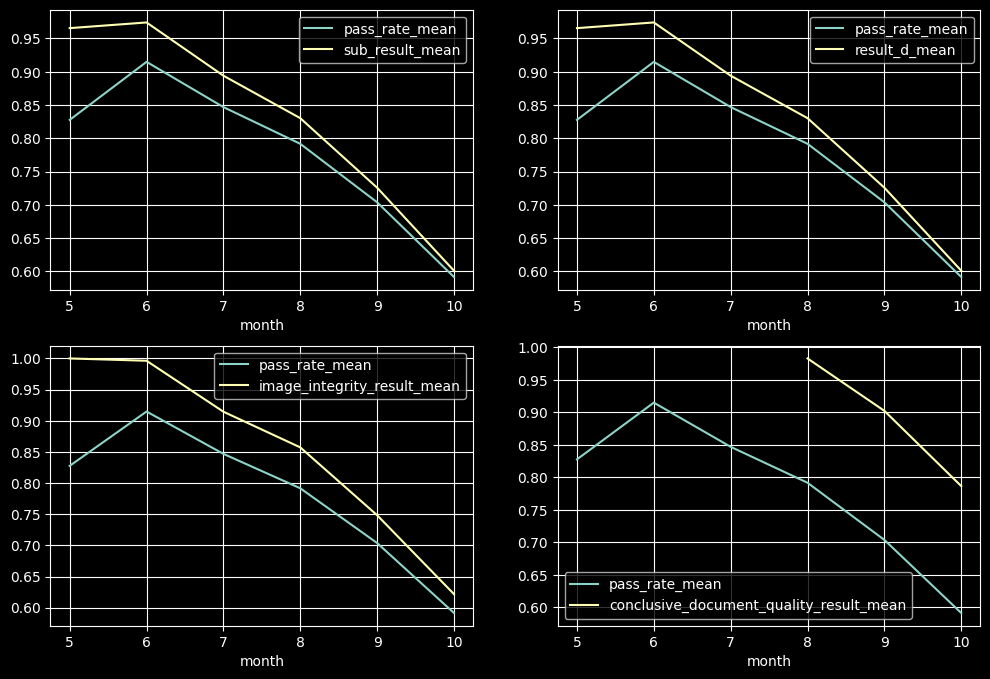

In [236]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
group_pass_rate_sr[['pass_rate_mean', 'sub_result_mean']].plot(ax=ax[0, 0], grid=True)
group_pass_rate_sr[['pass_rate_mean', 'result_d_mean']].plot(ax=ax[0, 1], grid=True)
group_pass_rate_sr[['pass_rate_mean', 'image_integrity_result_mean']].plot(ax=ax[1, 0], grid=True)
group_pass_rate_sr[['pass_rate_mean', 'conclusive_document_quality_result_mean']].plot(ax=ax[1, 1], grid=True)
plt.show()

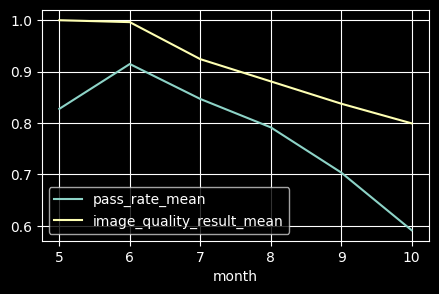

In [237]:
group_pass_rate_sr[['pass_rate_mean', 'image_quality_result_mean']].plot(grid=True, figsize = (5,3));

Проверка зависимости `conclusive_document_quality_result` с другими признаками.

In [239]:
df[req_col][df['month'] >= 7].corr()['conclusive_document_quality_result']\
                            .sort_values(ascending=False)

conclusive_document_quality_result    1.000000
image_integrity_result                0.997326
result_d                              0.894496
sub_result                            0.894496
pass_rate                             0.837351
face_comparison_result                0.054539
result_f                              0.030344
facial_image_integrity_result         0.023630
face_detection_result                 0.021498
data_validation_result                0.010278
visual_authenticity_result_d         -0.000248
colour_picture_result                -0.010188
data_consistency_result              -0.016041
month                                -0.222822
image_quality_result                       NaN
supported_document_result                  NaN
data_comparison_result                     NaN
police_record_result                       NaN
compromised_document_result                NaN
Name: conclusive_document_quality_result, dtype: float64

Проверка нелинейной зависимости `conclusive_document_quality_result` с другими признаками с помощью phik матрицы.

In [240]:
df[req_col][df['month'] >= 7].phik_matrix()['conclusive_document_quality_result']\
                            .sort_values(ascending=False)

interval columns not set, guessing: ['pass_rate', 'result_d', 'result_f', 'visual_authenticity_result_d', 'image_integrity_result', 'face_detection_result', 'image_quality_result', 'supported_document_result', 'conclusive_document_quality_result', 'colour_picture_result', 'data_validation_result', 'data_consistency_result', 'data_comparison_result', 'police_record_result', 'compromised_document_result', 'sub_result', 'face_comparison_result', 'facial_image_integrity_result', 'month']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable data_comparison_result for analysis 0. Dropping this column
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable police_record_result for analysis 1. Dropping this column
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable compromised_document_result for analysis 1. Dropping this column
  warnings.warn(


conclusive_document_quality_result    1.000000
image_integrity_result                0.999980
result_d                              0.985966
sub_result                            0.985966
pass_rate                             0.967043
month                                 0.134780
face_comparison_result                0.060719
result_f                              0.033094
facial_image_integrity_result         0.016103
visual_authenticity_result_d          0.000000
face_detection_result                 0.000000
colour_picture_result                 0.000000
data_validation_result                0.000000
data_consistency_result               0.000000
image_quality_result                       NaN
supported_document_result                  NaN
Name: conclusive_document_quality_result, dtype: float64

Доля пропуско `conclusive_document_quality_result` после его внедрения.

In [241]:
df[df['month'] >= 8]['conclusive_document_quality_result'].isna().mean()

0.2865979381443299

`conclusive_document_quality_result` - качество документа для его проверки.

Как вид из данных до 8 месяца `conclusive_document_quality_result` не была внедрена, после же ее внедрения основная метрика `pass_rate` начала падать. Так же заметим, что остальные признаки, которые влияют на `pass_rate` сильно коррелируют с `conclusive_document_quality_result`. Можно сделать вывод о том, что `conclusive_document_quality_result` это и есть то из-за чего `pass_rate` стал резко падать.

Так как мы поняли, что основная проблема заключается в `conclusive_document_quality_result` то посмотрим документы, которые предоставляли пользователи. Возможно, `pass_rate` падает только на определенных документах и их можно будет выявить.

### Проверка документов

Создание нового DataFrame для работы с документами

In [254]:
df_prop = df.copy()

Перевод `properties_d` из строк в словари и проверка пропусков.

* 0 - пропуск.

In [255]:
df_prop['properties_d'] = df_prop['properties_d'].apply(eval)
df_prop['properties_d_flag'] = (df_prop['properties_d'].apply(len) > 0) * 1
df_prop['properties_d_flag'].value_counts(normalize=True)

1    0.850413
0    0.149587
Name: properties_d_flag, dtype: float64

Посмотрим долю заполненных `properties_d_flag` по месяцам. Видно, что пропусков `properties_d` мало.

In [256]:
df_prop[['properties_d_flag', 'month']].groupby('month')\
                                       .agg(['count', 'mean'])

properties_d_flag          
                  count      mean
month                            
5                    58  1.000000
6                   270  0.996296
7                  1123  0.914515
8                  1219  0.867104
9                  1232  0.829545
10                 1914  0.790491

Парсинг словарей из `properties_d` и перевод их в колонки DataFrame df_prop

In [257]:
df_prop = pd.concat([df_prop, df_prop['properties_d'].apply(pd.Series)], axis=1)

<ipython-input-257-9919346751bd>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_prop = pd.concat([df_prop, df_prop['properties_d'].apply(pd.Series)], axis=1)
<ipython-input-257-9919346751bd>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_prop = pd.concat([df_prop, df_prop['properties_d'].apply(pd.Series)], axis=1)
<ipython-input-257-9919346751bd>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_prop = pd.concat([df_prop, df_prop['properties_d'].apply(pd.Series)], axis=1)
<ipython-input-257-9919346751bd>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype

Перевод строки date_of_expiry в datetime.

In [258]:
df_prop['date_of_expiry'] = pd.to_datetime(df_prop['date_of_expiry'], format='%Y-%m-%d')
df_prop['date_of_expiry']

0      2023-12-05
1      2020-05-13
2      2023-11-15
3      2021-01-27
4             NaT
          ...    
5875   2023-10-25
5876          NaT
5877   2025-06-02
5878   2027-09-28
5879   2023-12-03
Name: date_of_expiry, Length: 5816, dtype: datetime64[ns]

Посмотрим столбцы df_prop, которые могут быть нам интересны для анализа документов, если в них много пропусков, то удалим их из df_prop для его дальнейшего анализа.

In [259]:
filter = ['date_of_expiry', 'gender', 'document_type',
          'issuing_country', 'nationality', 'issuing_date',
          'issuing_state', 'document_version', 'properties_d',
          'pass_rate', 'month']

df_prop[filter].isna().mean().sort_values(ascending=False)

document_version    0.999656
issuing_state       0.994326
issuing_date        0.709250
nationality         0.559663
gender              0.320495
date_of_expiry      0.266334
document_type       0.149759
issuing_country     0.149587
properties_d        0.000000
pass_rate           0.000000
month               0.000000
dtype: float64

Основные колонки, которые нужны для анализа документов.

In [260]:
filter = ['date_of_expiry', 'gender', 'document_type',
          'issuing_country', 'pass_rate', 'month']

df_prop[filter].isna().mean().sort_values(ascending=False)

gender             0.320495
date_of_expiry     0.266334
document_type      0.149759
issuing_country    0.149587
pass_rate          0.000000
month              0.000000
dtype: float64

In [261]:
df_prop = df_prop[filter]
df_prop.sample(3)

,date_of_expiry,gender,document_type,issuing_country,pass_rate,month
3504,2019-01-07,Male,passport,MDG,1,9
2042,2018-07-03,Female,passport,FRA,1,8
2299,NaT,NaN,NaN,NaN,0,8


Если рассматривать `pass_rate` и `issuing_country` (страна выдачи документа) то видно, что последние месяцы `pass_rate` также падает по всем странам.

In [262]:
df_prop.pivot_table(values='pass_rate',
                    columns='month',
                    index='issuing_country',
                    aggfunc=['count', 'mean'])

count                                     mean            \
month              5     6      7      8      9      10     5         6    
issuing_country                                                            
ALB               NaN   NaN    NaN    NaN    NaN    2.0    NaN       NaN   
ARG               NaN   NaN    NaN    NaN    1.0    1.0    NaN       NaN   
AUS               NaN   2.0    4.0    3.0    2.0    5.0    NaN  1.000000   
AUT               NaN   2.0    5.0    4.0    9.0    7.0    NaN  1.000000   
BEL               NaN   1.0    8.0   13.0   10.0   17.0    NaN  1.000000   
BGD               NaN   NaN    NaN    NaN    1.0    1.0    NaN       NaN   
BGR               NaN   3.0    6.0    6.0    6.0    8.0    NaN  1.000000   
BLR               NaN   NaN    NaN    2.0    2.0    1.0    NaN       NaN   
BRA               NaN   2.0    1.0    6.0    4.0    1.0    NaN  1.000000   
CAN               NaN   NaN    3.0    2.0    2.0    5.0    NaN       NaN   
CHE               NaN   3.0   18.0   23.0   18.0   21.0    NaN  1.000000   
CHL               NaN   NaN    1.0    NaN    NaN    1.0    NaN       NaN   
CHN               NaN   NaN    1.0    2.0    4.0    4.0    NaN       NaN   
COL               NaN   1.0    1.0    NaN    NaN    1.0    NaN  1.000000   
CYP               2.0   1.0    2.0    8.0   10.0    7.0  1.000  1.000000   
CZE               NaN   1.0   11.0    5.0    2.0   13.0    NaN  1.000000   
DEU               2.0  10.0   29.0   21.0   26.0   49.0  1.000  0.900000   
DNK               NaN   3.0    1.0    3.0    1.0    5.0    NaN  1.000000   
DOM               NaN   NaN    NaN    NaN    1.0    NaN    NaN       NaN   
DZA               NaN   NaN    1.0    NaN    NaN    2.0    NaN       NaN   
ECU               NaN   NaN    NaN    NaN    NaN    1.0    NaN       NaN   
ESP               4.0  15.0   69.0   91.0   78.0   66.0  1.000  0.933333   
EST               NaN   1.0    2.0    4.0    3.0    3.0    NaN  1.000000   
FIN               NaN   NaN    NaN    4.0    NaN    4.0    NaN       NaN   
FRA               8.0  36.0  161.0  180.0  158.0  252.0  0.750  0.916667   
GBR              24.0  95.0  303.0  261.0  247.0  369.0  0.875  0.936842   
GGY               NaN   NaN    NaN    NaN    1.0    NaN    NaN       NaN   
GIB               NaN   3.0    5.0    5.0    7.0    5.0    NaN  1.000000   
GRC               3.0   5.0   31.0   25.0   24.0   26.0  1.000  0.600000   
HKG               NaN   NaN    NaN    1.0    NaN    NaN    NaN       NaN   
HND               NaN   1.0    NaN    NaN    NaN    NaN    NaN  1.000000   
HRV               NaN   NaN    6.0    1.0    4.0    6.0    NaN       NaN   
HUN               NaN   2.0   14.0   10.0   20.0   16.0    NaN  0.500000   
IMN               NaN   NaN    NaN    NaN    2.0    NaN    NaN       NaN   
IND               NaN   3.0    4.0    7.0    3.0    4.0    NaN  1.000000   
IRL               3.0  12.0   73.0   66.0   50.0  109.0  1.000  1.000000   
IRN               NaN   NaN    1.0    NaN    NaN    NaN    NaN       NaN   
ISL               NaN   NaN    NaN    NaN    1.0    NaN    NaN       NaN   
ITA               NaN  10.0   30.0   35.0   34.0   48.0    NaN  0.700000   
JEY               NaN   1.0    1.0    1.0    2.0    3.0    NaN  1.000000   
KOR               NaN   NaN    NaN    1.0    NaN    NaN    NaN       NaN   
LTU               1.0  12.0   45.0   61.0   86.0  194.0  0.000  0.833333   
LUX               NaN   NaN    NaN    1.0    1.0    1.0    NaN       NaN   
LVA               NaN   1.0    3.0    8.0   17.0   17.0    NaN  1.000000   
MAR               NaN   NaN    1.0    2.0    3.0    1.0    NaN       NaN   
MDG               NaN   NaN    NaN    NaN    1.0    NaN    NaN       NaN   
MEX               NaN   NaN    NaN    NaN    NaN    3.0    NaN       NaN   
MLT               NaN   1.0    3.0    7.0    6.0    7.0    NaN  1.000000   
MYS               NaN   NaN    NaN    1.0    3.0    2.0    NaN       NaN   
NLD               1.0   5.0   19.0   21.0   16.0   21.0  1.000  

In [263]:
df_prop.pivot_table(values='pass_rate',
                    columns='month',
                    index='document_type',
                    aggfunc=['count', 'mean'])

count                                        mean  \
month                     5     6      7      8      9      10        5    
document_type                                                              
driving_licence         21.0  95.0  365.0  326.0  322.0  551.0  0.857143   
national_identity_card  18.0  87.0  342.0  365.0  389.0  549.0  0.777778   
passport                19.0  87.0  304.0  338.0  276.0  395.0  0.842105   
residence_permit         NaN   NaN   16.0   28.0   34.0   18.0       NaN   

                                                                          
month                         6         7         8         9         10  
document_type                                                             
driving_licence         0.884211  0.917808  0.898773  0.850932  0.754991  
national_identity_card  0.919540  0.938596  0.934247  0.868895  0.834244  
passport                0.954023  0.921053  0.899408  0.811594  0.620253  
residence_permit             NaN  0.937500  0.964286  0.882353  0.722222

Если рассматривать `pass_rate` и `document_type` (тип документа) то видно, что последние месяцы `pass_rate` также падает по всем типам документов. Нет конкретного документа по которому спад получился больше всего.

Text(0.5, 0, 'mean, month')

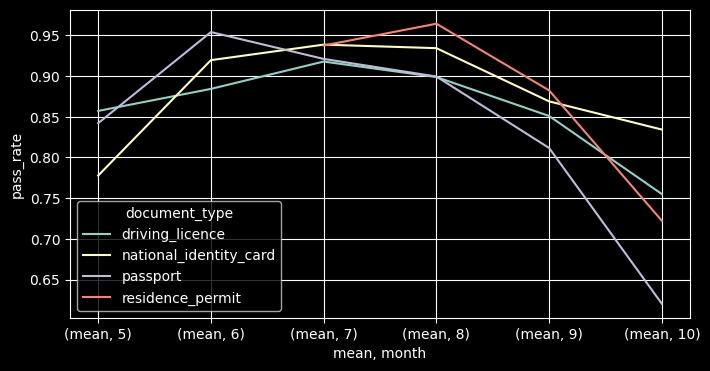

In [264]:
ax = df_prop.pivot_table(values='pass_rate',
                    columns='month',
                    index='document_type',
                    aggfunc=['mean']).T.plot(grid=True, figsize = (8,4))

ax.set_ylabel('pass_rate')
ax.set_xlabel('mean, month')

Если рассматривать `pass_rate` и `gender` (пол) то видно, что последние месяцы `pass_rate` также падает как по мужчинам, так и по женщинам.

In [265]:
df_prop.pivot_table(values='pass_rate',
                    columns='month',
                    index='gender',
                    aggfunc=['mean'])

mean                                                  
month         5         6         7         8         9         10
gender                                                            
Female  0.800000  0.925000  0.929630  0.934932  0.852349  0.731765
Male    0.862069  0.945205  0.935714  0.907666  0.828846  0.715447

Text(0.5, 0, 'mean, month')

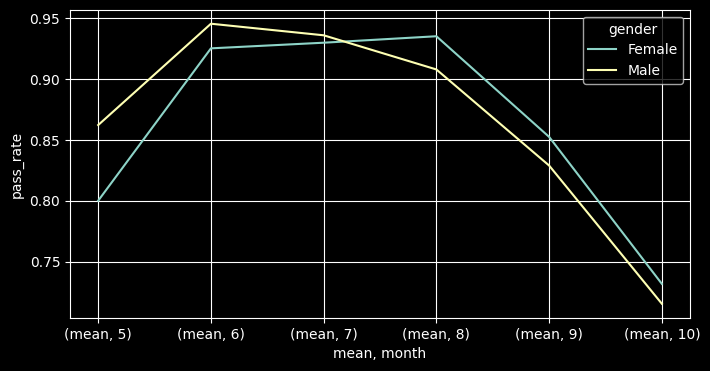

In [266]:
ax = df_prop.pivot_table(values='pass_rate',
                    columns='month',
                    index='gender',
                    aggfunc=['mean']).T.plot(grid=True, figsize = (8,4))

ax.set_ylabel('pass_rate')
ax.set_xlabel('mean, month')

К сожалению, `pass_rate` падает на всех документах и выявить какой-либо конкретный тип не удалось.

### Вывод

`conclusive_document_quality_result` - качество документа для его проверки.

После внедрения `conclusive_document_quality_result` основная метрика `pass_rate` начала падать. Так же было замечено, что остальные признаки, которые влияют на `pass_rate` сильно коррелируют с `conclusive_document_quality_result`.

 Из этого можно сделать вывод о том, что `conclusive_document_quality_result` это и есть то, из-за чего `pass_rate` упал.

 Рекомендуется убрать `conclusive_document_quality_result` из продукта и либо усовершенствовать его работу а затем внедрять, либо отказать вовсе.





<Axes: xlabel='month'>

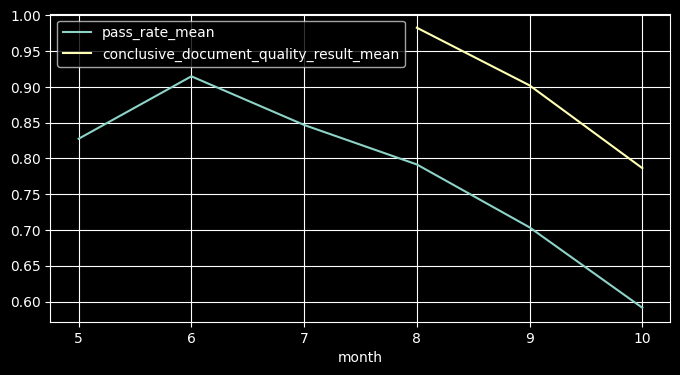

In [270]:
group_pass_rate_sr[['pass_rate_mean', 'conclusive_document_quality_result_mean']].plot(figsize=(8, 4), grid=True)